Aim: TO apply and analyze the effect of gaussian , sobel , and median filter on digital image ,demonstration their respective functionalities in noice reduction, edge detection , and noice removal.

***WITHOUT NOICE***

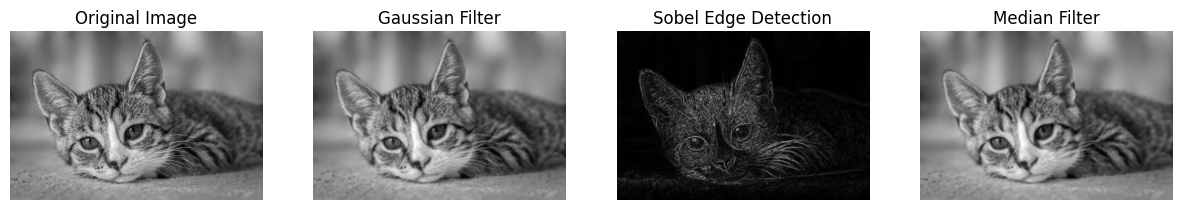

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

image_path = '/content/european-shorthair-8601492_640.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

median_blur = cv2.medianBlur(image, 5)

images = [image, gaussian_blur, sobel_edges, median_blur]
titles = ['Original Image', 'Gaussian Filter', 'Sobel Edge Detection', 'Median Filter']

display_images(images, titles)


***WITH NOICE***

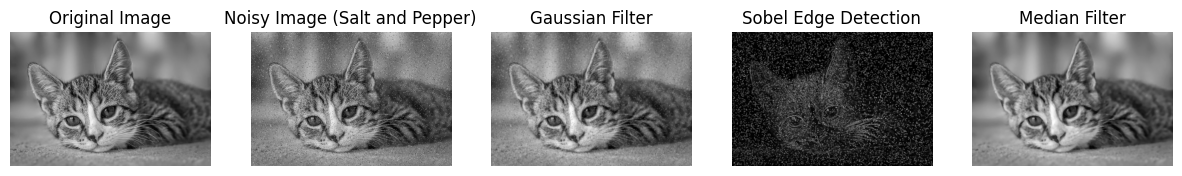

In [ ]:

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)

sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

median_blur = cv2.medianBlur(noisy_image, 5)


images = [image, noisy_image, gaussian_blur, sobel_edges, median_blur]
titles = ['Original Image', 'Noisy Image (Salt and Pepper)', 'Gaussian Filter',
          'Sobel Edge Detection', 'Median Filter']


display_images(images, titles)



***SOME EXTRA FILTERS***



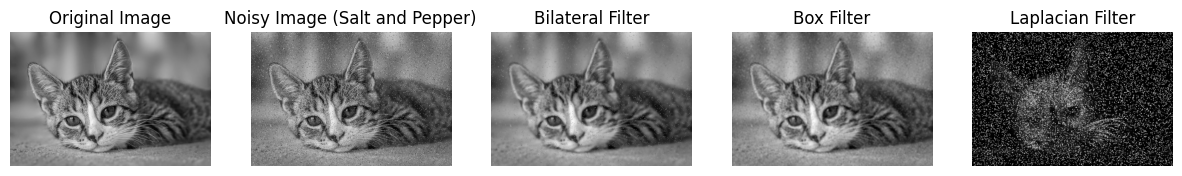

In [ ]:

bilateral_filter = cv2.bilateralFilter(noisy_image, 9, 75, 75)
box_filter = cv2.boxFilter(noisy_image, -1, (5, 5))

laplacian_filter = cv2.Laplacian(noisy_image, cv2.CV_64F)
laplacian_filter = cv2.convertScaleAbs(laplacian_filter)
images = [image, noisy_image, bilateral_filter, box_filter, laplacian_filter]
titles = ['Original Image', 'Noisy Image (Salt and Pepper)', 'Bilateral Filter',
          'Box Filter', 'Laplacian Filter']
display_images(images, titles)
